Searching for Christopher in small_img.zip
Results found in file a-0.png


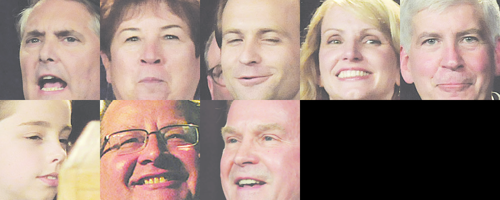

Results found in file a-3.png


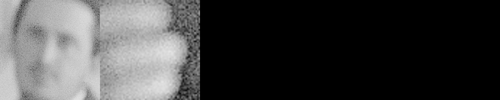

Searching for Mark in images.zip
Results found in file a-0.png


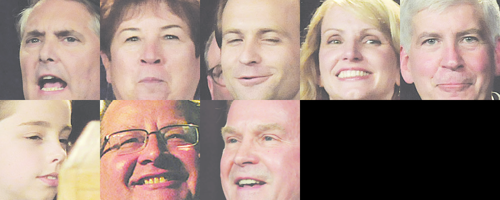

Results found in file a-1.png


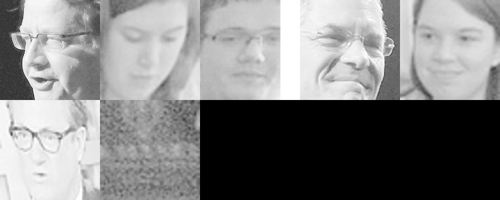

Results found in file a-2.png


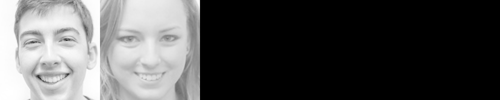

Results found in file a-3.png


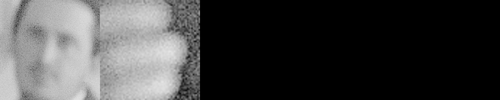

Results found in file a-8.png


'But there were no faces in that file!'

In [32]:
import zipfile


from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np


# loading the face detection classifier
#it gives a list of detected faces, with same height
def list_faces(img,h_img=150):
    lista = []
    pix = np.array(img)
    gray = cv.cvtColor(pix, cv.COLOR_BGR2GRAY)
    face_cascade = cv.CascadeClassifier('readonly/haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray,1.30)
    #faces = face_cascade.detectMultiScale(gray) 
    if len(faces)>0:
        rec=faces.tolist()[0]
        for left,up,width,height in faces.tolist():
            img_final = img.crop([left,up,left+width,up+height])
            #scale image
            scale = h_img/img_final.height
            img_final = img_final.resize((int(scale*img_final.width),int(scale*img_final.height)),Image.BICUBIC)
            lista.append(img_final)
    return lista

#gives true if the word if found in the file
def palabra_enc(img,word):
    text = pytesseract.image_to_string(img)
    return word in text.split()


#orders a list of images in a single sheet
def present_lfaces(limg,cols=5):
    rows =  int(len(limg)/cols)
    if len(limg)%cols > 0:
        rows += 1
    contact_sheet=Image.new(limg[0].mode, (limg[0].width*cols,limg[0].height*rows))
    x=0
    y=0 
    for img in limg:
        contact_sheet.paste(img, (x, y) )
        if x+limg[0].width == contact_sheet.width:
            x=0
            y=y+limg[0].height
        else:
            x=x+limg[0].width
    contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
    return(contact_sheet)
    
    
proofs = [("Christopher",'small_img.zip'),("Mark",'images.zip')]    


# Read zip

for word,file in proofs:
    print("Searching for {} in {}".format(word,file))
    myzip = zipfile.ZipFile(file)
    for info in myzip.infolist():
        ifile = myzip.open(info) #open zip
        img = Image.open(ifile)
        if palabra_enc(img,word): #if word if found, process that file
            print("Results found in file {}".format(info.filename))
            lfaces = list_faces(img,h_img=200)
            if len(lfaces)>0:
                presenta = present_lfaces(lfaces)
                display(presenta)
            else:
                display('But there were no faces in that file!')    
    
    